# Generators

* Generators are basically special kind of function which contains yield keyword instead of the return keyword, these are basically lazy iterator are used as the itarator just like other iterable like list, tuple, set and arrays.

* The basic use of the generators is that they don;t hold all the database at once they only give us some amount of data at a time , and the advantage of this is that we can do on large amount data in less memory with generators

## Making generators by defining method

In [2]:
# Now we will make a afunction in which we will use yield insted of the return
def my_func():
    
    str_1 = "Hello world"
    str_2 = "Hello world again"
    
    # Now we will use yield
    yield str_1
    yield str_2

In [4]:
# Now if we inspect this fuction then we will get that this is generator
my_func()

<generator object my_func at 0x00000217699A1890>

Now you can see that this is generator object , in which it yield an object at a time and suspends the function untill next call, we can call the next by using the `next()` method of we can use the for loop or a while loop to call this method.

In [9]:
# before using the generator we will store it in another variable
gen = my_func()
# Now after creating the gen we can use this gen by calling next method or in a for loop

In [10]:
# getting the first object or value by using the next method
next(gen)

'Hello world'

Now if you can see that we have put two yield statement but only one of them is called, this is because yield statement will suspend the function execution after executing the yield. When the function is suspended, the state of the functionis saved.

In [11]:
# Now if we call this my_func method by using the next method then it will return the "Hello world again" 
next(gen)

'Hello world again'

Now you can see that this time it yielded the second string as we expected. So, Now we will see that how it is usefull over the list or any other iterable which holds all the data in once.

## Creaging a generator by using genxpr.

In [19]:
# We can also create the  generator with the help of tuple comprehensive or we can say gen expression.
# Now if we make a list with 100 item and also we make a gen with same item then we will compare the size of the object
list_obj = [i for i in range(100)]
gen_obj = (i for i in range(100))

In [16]:
# Now if we compare the size of the object by using the sys.sizeof()
import sys
print("size of the list: ", sys.getsizeof(list_obj))
print("size of the gen: ", sys.getsizeof(gen_obj))

size of the list:  904
size of the gen:  112


As you can see that there is a houge difference in the memory of the object, this difference is because gen don't holds all the values at the same time while executing but the list holds all the value at once that's why list are not usable while handling the large amount of data.
 
In this kind of situation we need to use the generators to handle the large amount of data. Now if we use the loop on the gen obj.

In [20]:
for i in gen_obj:
    print(i, end=',')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,

In [22]:
# and now if we use the next method on the gen_obj it will raise Exeption "StopItertion"
# because there is no element remaining in the gen_obj.
next(gen_obj)

StopIteration: 

Note: if we use the generator with for loop then we will not get any `StopIteration` Error because it will handle the error itself but in case of `while loop` and `next()` method we need to handle the execption by manually.

## Advance generator methods

Until now we have seen a normal generator which uses only a yield keyword but a generator can alos use some special methods like `.send(), .throw(), .close()`

### Using .send() method

To explain the .send() method working principle we will use a inifinite sequence generator with some filtering. for that we will use `palindrome_detector`
it will filter all the value which are same in read from both sides (left and right). for that first of all we need to make a palindrom method.

In [25]:
# Making a palindrom detector which will filter all the palindrom values.
def is_palindrom(num):
    """
    num: number which is need to check that it is a palindrom or not.
    """
    
    if num // 10 == 0:
        return False
    
    temp = num
    reversed_num = 0
    
    while temp != 0:
        reversed_num = (reversed_num * 10) + (temp % 10)
        temp = temp // 10
        
    if num == reversed_num:
        return True
    else:
        return False

In [26]:
# Now we will test 1221 is a palindrom or not
print(is_palindrom(1221))

True


Now we can see that it is returning True because our number is a palindrom number now we will generate 100 palindrom number from 0.

In [34]:
# to generate finite or infinite palindrom, we will make another method 
def palindroms():
    num = 0
    
    while True:
        if is_palindrom(num):
            i = yield num    # here you can see that here we have assigned i with the value of yield num
            # it means the yield is sending num to i variable now this i value can be handled outside the gen by using 
            # the send() method on the gen object.
            
            # This allows you to manipulate the yielded value. More importantly, it allows you to .send() as value back to genertor. 
            # when execution picks up after yield, i wil take the value that is sent.
            if i is not None:
                print("\nINFO In Gen: getting back i form the send method: ", i)
                num = i
        num +=1

In [35]:
# Now we will intiate the generator object in a variable so we can use it :
gen = palindroms()
for i in gen:
    print("INFO outside to gen: getting form gen: ", i)
    # here i is the value which is yielded from the generator.
    digits = len(str(i)) # getting the length of the digits
    print('next i will be in digits: ', digits+1)
    gen.send(10**digits)  # this will sent back to the i variable which is defined in the generator.
    if i > 1000:
        break

INFO outside to gen: getting form gen:  11
next i will be in digits:  3

INFO In Gen: getting back i form the send method:  100
INFO outside to gen: getting form gen:  111
next i will be in digits:  4

INFO In Gen: getting back i form the send method:  1000
INFO outside to gen: getting form gen:  1111
next i will be in digits:  5

INFO In Gen: getting back i form the send method:  10000


NOw you can see that we  can manipulate the yielded value and from outside the genertor and we can send it in the generator again, and also there we can manipulate the value. 

In general we can get some information, value, object or instance after yielded an object or a value it can be helpful in various situation. when we want to put some restriction or some kind of logic before yielding another object from the generator.

### Using .throw() method
it allows you to throw exception with the generator. if we write the above code with an additional line to produce some exception.

In [39]:
# Now we will intiate the generator object in a variable so we can use it :
gen = palindroms()
for i in gen:
    print("INFO outside to gen: getting form gen: ", i)
    # here i is the value which is yielded from the generator.
    digits = len(str(i)) # getting the length of the digits
    print('next i will be in digits: ', digits+1)
    if digits == 5:
        gen.throw(ValueError("can't generate greater then 5 digits palindrom"))
    gen.send(10**digits)  # this will sent back to the i variable which is defined in the generator.
    

INFO outside to gen: getting form gen:  11
next i will be in digits:  3

INFO In Gen: getting back i form the send method:  100
INFO outside to gen: getting form gen:  111
next i will be in digits:  4

INFO In Gen: getting back i form the send method:  1000
INFO outside to gen: getting form gen:  1111
next i will be in digits:  5

INFO In Gen: getting back i form the send method:  10000
INFO outside to gen: getting form gen:  10101
next i will be in digits:  6


ValueError: can't generate greater then 5 digits palindrom

Throw method can be useful while generating infinite sequence and we want to break the loop with some exception condition then throw can be useful.

### Using .close() method

close method is similar to the .throw() method it also help us to close the loop in a particular condition (if we set that) and it stops the loop with StopIteration Excetption. 

Now if we replace our .throw() method with .close() method then our gen will stop with an StopIteration Exception.

In [40]:
# Now we will intiate the generator object in a variable so we can use it :
gen = palindroms()
for i in gen:
    print("INFO outside to gen: getting form gen: ", i)
    # here i is the value which is yielded from the generator.
    digits = len(str(i)) # getting the length of the digits
    print('next i will be in digits: ', digits+1)
    if digits == 5:
        gen.close()
    gen.send(10**digits)  # this will sent back to the i variable which is defined in the generator.
    

INFO outside to gen: getting form gen:  11
next i will be in digits:  3

INFO In Gen: getting back i form the send method:  100
INFO outside to gen: getting form gen:  111
next i will be in digits:  4

INFO In Gen: getting back i form the send method:  1000
INFO outside to gen: getting form gen:  1111
next i will be in digits:  5

INFO In Gen: getting back i form the send method:  10000
INFO outside to gen: getting form gen:  10101
next i will be in digits:  6


StopIteration: 

As you can see that we have stopped the iteration with StopIteration , because it uses the StopIteration Exception and if we want to use different Exception then we need to use the .throw() method.

___

## Creating Data Pipelines With Generators
Data pipelines allows you tho string together code to process large datasets or streams of data without maxing out your machine's memory. Here we will use a Timer_Data.csv which is not large but we can use any large dataset .

In [42]:
# first of all we will see that how our dataset looks like with the help of the pandas
import pandas as pd

In [43]:
data = pd.read_csv('Timer_Data.csv')

In [45]:
data.head(10)

,Record Type,Record Name,Record Topic,Record SubTopic,Date,Start Time,TTime,CTime,End Time,ETime,Total Time,Restart-1,R1-Start Time,R1-CTime,R1-End Time,R1-ETime
0,Activity,Timer,Testing,Total time,02-Jun-21,5:54:51 PM,00:01:00,00:01:00,5:56:06 PM,00:00:14,75,NaN,NaN,NaN,NaN,NaN
1,Activity,Timer,Save countdown time,testing,02-Jun-21,6:59:08 PM,00:01:00,00:01:00,7:00:30 PM,00:00:20,153,00:01:00,7:00:30 PM,00:01:00,7:01:44 PM,00:00:11
2,Activity,Timer,Countdown,Test Saving timer,02-Jun-21,7:03:19 PM,00:01:00,00:01:00,7:04:25 PM,00:00:04,65,NaN,NaN,NaN,NaN,NaN
3,Activity,Testing,testing time,Saving time,03-Jun-2021,11:34:42 AM,00:01:00,00:01:00,11:36:26 AM,00:00:43,103,NaN,NaN,NaN,NaN,NaN
4,Activity,Recording ACtivity,Fresh,Test Saving Time,03-Jun-2021,11:42:26 AM,00:5:00,00:05:00,11:54:52 AM,NaN,746,NaN,NaN,NaN,NaN,NaN
5,Activity,Food,Take breakfast,Breakfast,03-Jun-2021,12:01:34 PM,00:15:00,NaN,NaN,NaN,233,NaN,NaN,NaN,NaN,NaN
6,Activity,Food Retry 1,Get BreakFast,BreakFast,03-Jun-2021,12:13:39 PM,00:15:00,00:15:00,12:43:04 PM,00:14:24,1764,NaN,NaN,NaN,NaN,NaN
7,Subject,Root,TM-TYT,NaN,04-Jun-2021,04:19:42 PM,00:01:00,00:00:30,04:20:13 PM,NaN,31,NaN,NaN,NaN,NaN,NaN
8,Activity,Testing,Watch List,Timer,04-Jun-2021,04:20:54 PM,00:01:00,00:01:00,04:22:03 PM,00:00:07,68,NaN,NaN,NaN,NaN,NaN
9,Subject,Root,TM-TYT,NaN,04-Jun-2021,05:20:51 PM,00:01:00,00:01:00,05:22:05 PM,00:00:12,73,NaN,NaN,NaN,NaN,NaN


So this is our data looks like now we will do some analytical work here we will compute Activity time in a day.

So here is the Recipe:
1. Read every line of the file.
2. Split each line into a list of values.
3. Extract the clumn names.
4. Use the column names and lists to create a dictionary.
5. Filter out the Record Type and other column in which you are not intrested.
6. Make a dictionary for separate day data. 
7. Calculate the total time of that Record Type time for a day.

`Note:` Here we will note use any kind of the module to do this thing, we will make ourself this kind of recipe to do some work with the help of the generators.

In [46]:
# So now first of all we need to read the file
file_name = 'Timer_Data.csv'
file_lines = (line for line in open(file_name))   # making a generator which will read one line at a time

In [47]:
# Now we will check that it is a generator or not
file_lines

<generator object <genexpr> at 0x000002177B46EC80>

As you can see that it is a generator, Now we will print our first with the help of next , first line of the file will be header so we will store it in a header variable.

In [48]:
header = next(file_lines)

In [49]:
# checking the headers
print(header)

Record Type,Record Name,Record Topic,Record SubTopic,Date,Start Time,TTime,CTime,End Time,ETime,Total Time,Restart-1,R1-Start Time,R1-CTime,R1-End Time,R1-ETime



As you can see that it return all the column name at once but we did not want that we need one column at a time so for that we need to make another generator which will give us the column vlaue one by one.

In [50]:
# resetting the data
file_name = 'Timer_Data.csv'
file_lines = (line for line in open(file_name)) 

# Now making another generator to hold the columns
line_cols = (x.rstrip().split(',') for x in file_lines)

Now this recent line again makes another generator which will give us the columns one by one.

In [51]:
# testing of column name by using the next , as we are excepting it should return only one line columns value at a time.
# also it will return a list  of column values not a string this time.
next(line_cols)

['Record Type',
 'Record Name',
 'Record Topic',
 'Record SubTopic',
 'Date',
 'Start Time',
 'TTime',
 'CTime',
 'End Time',
 'ETime',
 'Total Time',
 'Restart-1',
 'R1-Start Time',
 'R1-CTime',
 'R1-End Time',
 'R1-ETime']

Now we have got our header in the form of list now we need to make a dictionary with the values and their corresponding column name. we can achieve this also by using the generator expression.

But going furthur we will reset our generator and we will store our header (column names)  in a variable.

In [53]:
# resetting the data
file_name = 'Timer_Data.csv'
file_lines = (line for line in open(file_name)) 

# Now making another generator to hold the columns
line_cols = (x.rstrip().split(',') for x in file_lines)

header = next(line_cols)   # storing the header or column names in the header 

In [54]:
print(header)

['Record Type', 'Record Name', 'Record Topic', 'Record SubTopic', 'Date', 'Start Time', 'TTime', 'CTime', 'End Time', 'ETime', 'Total Time', 'Restart-1', 'R1-Start Time', 'R1-CTime', 'R1-End Time', 'R1-ETime']


In [55]:
# Now creating the dict for each row values.
data_dict  = (dict(zip(header, value)) for value in line_cols)

Now this is also a data_dict which will return the dict of our data,  header value as key and row values as the value fo their corresponding keys.   

In [56]:
# Now if we want to check our first dict then we can use it by using a next method.
next(data_dict)

{'Record Type': 'Activity',
 'Record Name': 'Timer',
 'Record Topic': 'Testing ',
 'Record SubTopic': 'Total time',
 'Date': '02-Jun-21',
 'Start Time': '5:54:51 PM',
 'TTime': '00:01:00',
 'CTime': '00:01:00',
 'End Time': '5:56:06 PM',
 'ETime': '00:00:14',
 'Total Time': '75',
 'Restart-1': '',
 'R1-Start Time': '',
 'R1-CTime': '',
 'R1-End Time': '',
 'R1-ETime': ''}

As you can see after applying three generator our data will look like this, and the best thing is that noting is stored in the memory excepte some bytes which is used to holds the generator state of variables and other values.

In [250]:
# Now we will get the total time of activity in a day for that we need to get the date activity and total time at the same time.
# these all condition can't be defined in a single line so we need to define our generator by using the function method.

def get_today_time(record, file):
    # here record is the record type
    # Now we will put all of our code here 
    
    #1. first of all reading the file
    rows = (row for row in open(file))
    
    #2. now we need to split the columns 
    cols = (x.rstrip().split(',') for x in rows)
    
    #3. now we need to store our column 
    header = next(cols)
    
    #4. Paring our header with each row values by making a dictionary
    data_dict = (dict(zip(header, value)) for value in cols)
    
    # Now we need to filter our record for a day.
    date = None    # to store the date only for once
    data = {}
    
    for row in data_dict:
        
        if row['Record Type'] == record:
            
            if isinstance(data.get(row['Date'], None), list):
                # if data has the list ofr data then appending the data of the same date.
                data[row['Date']].append(row)
            else:
                if isinstance(data.get(date, None), list):
                    yield date, (i for i in data[date])
                    # after yielding we will delete the data of 
                    del data[date]
                    
                date = row['Date'] 
                data[row['Date']] = [row]
                
                # if data do not have data correponding to the date then will assing a list and we will add a row 
                # which has the data of the date .
                
    # Now we will return the final data which will not be yielded because of misplaced conditions
    yield date, (i for i in data[date])
    del data 
    del date # finally deleting the date and data.

In [251]:
# Now need to initate the generatro by providing the file name and Record Type
data_gen = get_today_time("Activity", "Timer_Data.csv")

In [252]:
# getting first day data
# day_one = next(data_gen)
# if we want to optimize the yielded data then 
date, data  = next(data_gen)   # getting one day data , date will hold date of the data
# data will hold the yielded 

In [253]:
for act in data:
    print(act)

{'Record Type': 'Activity', 'Record Name': 'Timer', 'Record Topic': 'Testing ', 'Record SubTopic': 'Total time', 'Date': '02-Jun-21', 'Start Time': '5:54:51 PM', 'TTime': '00:01:00', 'CTime': '00:01:00', 'End Time': '5:56:06 PM', 'ETime': '00:00:14', 'Total Time': '75', 'Restart-1': '', 'R1-Start Time': '', 'R1-CTime': '', 'R1-End Time': '', 'R1-ETime': ''}
{'Record Type': 'Activity', 'Record Name': 'Timer ', 'Record Topic': 'Save countdown time', 'Record SubTopic': 'testing', 'Date': '02-Jun-21', 'Start Time': '6:59:08 PM', 'TTime': '00:01:00', 'CTime': '00:01:00', 'End Time': '7:00:30 PM', 'ETime': '00:00:20', 'Total Time': '153', 'Restart-1': '00:01:00', 'R1-Start Time': '7:00:30 PM', 'R1-CTime': '00:01:00', 'R1-End Time': '7:01:44 PM', 'R1-ETime': '00:00:11'}
{'Record Type': 'Activity', 'Record Name': 'Timer', 'Record Topic': 'Countdown', 'Record SubTopic': 'Test Saving timer', 'Date': '02-Jun-21', 'Start Time': '7:03:19 PM', 'TTime': '00:01:00', 'CTime': '00:01:00', 'End Time': '7

In [257]:
project_data = get_today_time("Project", "Timer_Data.csv")
subject_data = get_today_time('Subject', 'Timer_Data.csv')
pt_time = 0
st_time = 0
for p, s in zip(project_data, subject_data):
    
    for project, subject in zip(p[1], s[1]):
        
        pt_time += int(project['Total Time'])
        st_time += int(subject['Total Time'])
#     print(f"{date}:\t {t_time/3600:.02f}")
    print(f"{p[0]}:\t {pt_time , st_time}")
    pt_time = 0
    st_time = 0
    


06-Jun-2021:	 (1465, 104)
07-Jun-2021:	 (21809, 317)
08-Jun-2021:	 (18615, 2517)
09-Jun-2021:	 (8765, 5640)
10-Jun-2021:	 (10687, 5097)
11-Jun-2021:	 (3424, 4844)
12-Jun-2021:	 (6754, 4391)
13-Jun-2021:	 (3751, 3875)
14-Jun-2021:	 (8526, 2301)
15-Jun-2021:	 (5660, 4003)
16-Jun-2021:	 (5841, 4290)
17-Jun-2021:	 (2588, 3771)
18-Jun-2021:	 (3485, 4364)
19-Jun-2021:	 (5975, 4958)
20-Jun-2021:	 (1991, 5094)
21-Jun-2021:	 (1867, 5589)
22-Jun-2021:	 (6018, 5475)
23-Jun-2021:	 (2608, 5283)


In [260]:
project_data = get_today_time("Project", "Timer_Data.csv")

t_time =0
for date, data in project_data:
    for row in data:
        t_time += int(row['Total Time'])
        
    print(f"{date}:\t {t_time}")
    t_time = 0

06-Jun-2021:	 12659
07-Jun-2021:	 21809
08-Jun-2021:	 18615
09-Jun-2021:	 19674
10-Jun-2021:	 12819
11-Jun-2021:	 12146
12-Jun-2021:	 18633
13-Jun-2021:	 3751
14-Jun-2021:	 24510
15-Jun-2021:	 18781
16-Jun-2021:	 20114
17-Jun-2021:	 10756
18-Jun-2021:	 3485
19-Jun-2021:	 9162
20-Jun-2021:	 10304
21-Jun-2021:	 6126
22-Jun-2021:	 11749
23-Jun-2021:	 8285
24-Jun-2021:	 11750
25-Jun-2021:	 15860
26-Jun-2021:	 13527
27-Jun-2021:	 22823
28-Jun-2021:	 15512
29-Jun-2021:	 13225


In [261]:
subject_data = get_today_time('Subject', 'Timer_Data.csv')
t_time =0
for date, data in subject_data:
    for row in data:
        t_time += int(row['Total Time'])
        
    print(f"{date}:\t {t_time}")
    t_time = 0

04-Jun-2021:	 104
05-Jun-2021:	 336
06-Jun-2021:	 2690
10-Jun-2021:	 5640
13-Jun-2021:	 5097
14-Jun-2021:	 4844
15-Jun-2021:	 4391
16-Jun-2021:	 3875
17-Jun-2021:	 2301
19-Jun-2021:	 4003
21-Jun-2021:	 4290
22-Jun-2021:	 3771
23-Jun-2021:	 4364
24-Jun-2021:	 4958
25-Jun-2021:	 5094
26-Jun-2021:	 5589
28-Jun-2021:	 5475
29-Jun-2021:	 5283


Now we will put this into another fucntion which will be considered as another pipline block which will compute the total_time for a desired Record Type.

In [298]:
def get_total_time(Record_type, file, col = 'Total Time', obj_type=int):
    
    """
    Record_type: type of the record for which we are looking for.
    file:str, file path in which we want to look.
    col: column name for which we want to canculate the sum of the value for given output
    obj_type: by default int 
    """
    t_time = 0
    data_gen = get_today_time(Record_type,file)
    for date, data in data_gen:
        
        for activity in data:
#             print(activity[col])
            t_time += int(activity[col])
        yield date, t_time
        t_time = 0
        # Now this will give us the total time for a particular record Type
    

In [301]:
project = get_total_time('Project', 'Timer_Data.csv') 
for date, time in project:
    print(f"{date}:\t {time}")

06-Jun-2021:	 12659
07-Jun-2021:	 21809
08-Jun-2021:	 18615
09-Jun-2021:	 19674
10-Jun-2021:	 12819
11-Jun-2021:	 12146
12-Jun-2021:	 18633
13-Jun-2021:	 3751
14-Jun-2021:	 24510
15-Jun-2021:	 18781
16-Jun-2021:	 20114
17-Jun-2021:	 10756
18-Jun-2021:	 3485
19-Jun-2021:	 9162
20-Jun-2021:	 10304
21-Jun-2021:	 6126
22-Jun-2021:	 11749
23-Jun-2021:	 8285
24-Jun-2021:	 11750
25-Jun-2021:	 15860
26-Jun-2021:	 13527
27-Jun-2021:	 22823
28-Jun-2021:	 15512
29-Jun-2021:	 13225


In [308]:
activity = get_total_time('ActivityClasses', 'Timer_Data.csv') 
print(f"Activityclasses: Total Time")
for date, time in activity:
    print(f"{date}:\t {time}")

Activityclasses: Total Time
12-Jun-2021:	 21820
13-Jun-2021:	 9340
14-Jun-2021:	 30106
15-Jun-2021:	 17866
16-Jun-2021:	 23375
17-Jun-2021:	 2963
18-Jun-2021:	 25154
19-Jun-2021:	 7979
20-Jun-2021:	 29171
21-Jun-2021:	 3354
22-Jun-2021:	 21124
23-Jun-2021:	 10696
24-Jun-2021:	 13860
25-Jun-2021:	 14388
26-Jun-2021:	 15912
27-Jun-2021:	 10152
28-Jun-2021:	 10948
29-Jun-2021:	 8857
30-Jun-2021:	 4404


In [309]:
print('size of project gen:', sys.getsizeof(project))
print('size of activity gen:',sys.getsizeof(activity))

size of project gen: 112
size of activity gen: 112


As you can see that both generator takes only 112 bytes because they dont hold the all the data at once, they compute the data at the genertor execution time.

Now we will do a compairison b/w list and generator. we will compute the time complexity and the memory taken by both list and generator in various kind of sets.

In [335]:
sets =[i*1000 for i in range(1,2000)]


In [341]:
import os
import sys
import time
import matplotlib.pyplot as plt

In [382]:
def list_test(sets):
    time_stamps = {}
    for value in sets:
        start = time.time()
        List = [i for i in range(value)]
        end = time.time()
        time_stamps.update({value:end-start})
    return time_stamps

def gen_test(sets):
    for index, value in enumerate(sets):
        yield index, (i for i in range(value))
    
    # time will be calculated outside the generator
    

In [338]:
List = list_test(sets)

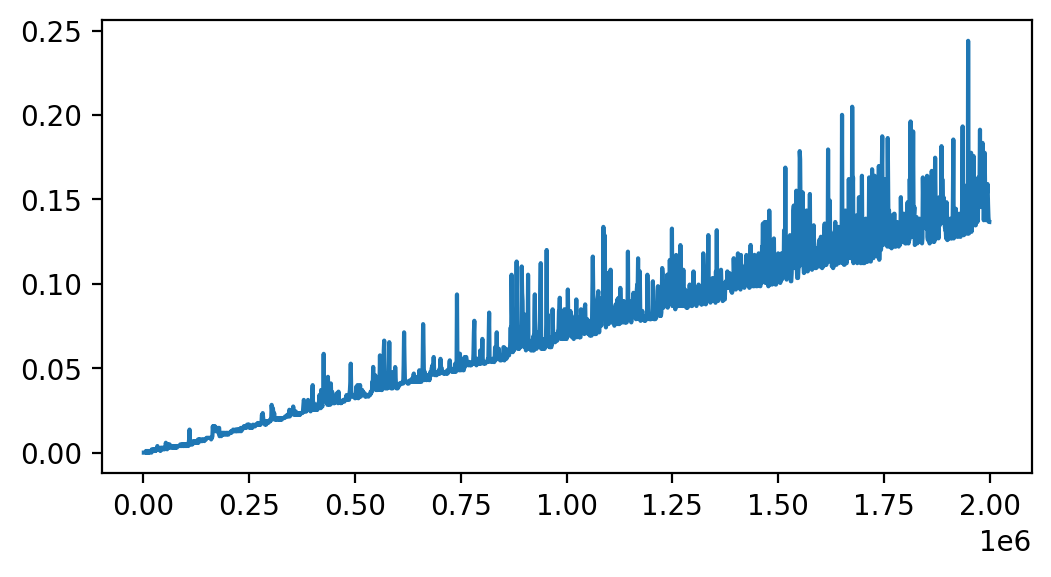

In [417]:
plt.figure(figsize=(6,3), dpi=200)
plt.plot(List.keys(), List.values())
plt.show()

As we can see that time increase with amount of data and number of iteration in linear 

In [387]:
print("total time taken: ", sum(List.values()))
print('Total size of list (in bytes): ', sys.getsizeof(List))
# in seconds

total time taken:  146.4121162891388
Total size of list (in bytes):  73816


In [384]:
Gen = gen_test(sets)

In [385]:
gen_time = {}
length = len(sets)
for index, each in Gen:
    print(f"\rProcessed: {index}/{length}", end='\t\r')
    start = time.time()
    for value in each:
        pass
    end = time.time()
    gen_time.update({value:end-start})    

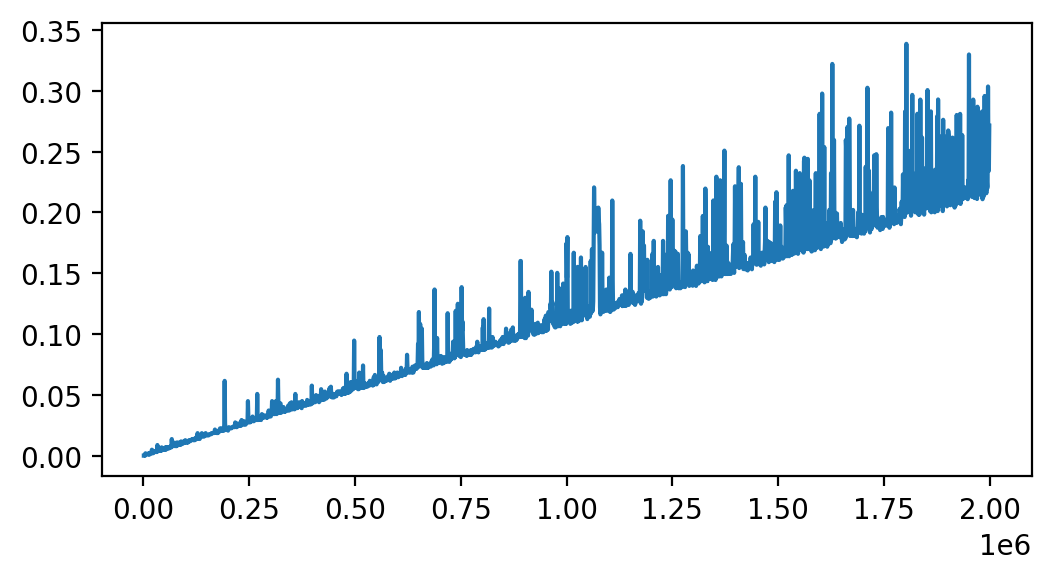

In [414]:
plt.figure(figsize=(6,3), dpi=200)
plt.plot(gen_time.keys(), gen_time.values())
plt.show()

As you can see that it's processing time also increases in linear manner , but it takes much time for each iteration then the list but at the same time it dont hold all the element that's why it can be usefull over list when we are working on the large amount of data.

In [389]:
print('Total time taken: ', sum(gen_time.values()))
print("Total memory taken: ", sys.getsizeof(Gen))

Total time taken:  233.1218123435974
Total memory taken:  112


Now we will make a comman graph by using only 100 values. 

In [397]:
xlist = list(List.keys())[::20]
ylist = list(List.values())[::20]

In [398]:
xgen = list(gen_time.keys())[::20]
ygen = list(gen_time.values())[::20]

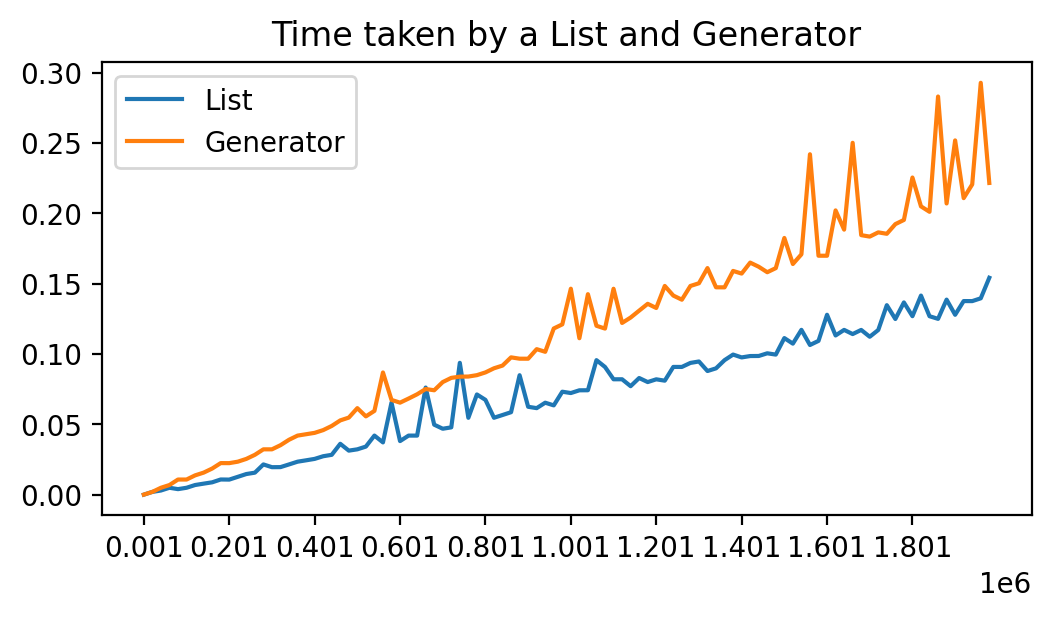

In [413]:
plt.figure(figsize=(6,3), dpi=200)
plt.plot(xlist, ylist)
plt.plot(xgen, ygen)
plt.title("Time taken by a List and Generator")
plt.legend(["List", "Generator"])
plt.xticks(xlist[::10])
plt.show()

Here from the gaph you can see that there is a large difference b/w the computation time for list and generator, here generator takes much time in each iteration then a list.